<a href="https://colab.research.google.com/github/girishdatsts/ChurnModel_CNN_BankData/blob/master/RForest_Fastai_hyptune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai==0.7.0

    100% |████████████████████████████████| 122kB 6.2MB/s 
    100% |████████████████████████████████| 3.6MB 7.7MB/s 
    100% |████████████████████████████████| 496.4MB 26kB/s 


In [0]:
from fastai.imports import*
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df_raw = pd.read_csv("/content/PyDatadDrive/Train.csv") 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_raw.head().transpose()

0  \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                     3   
YearMade                                                      2004   
MachineHoursCurrentMeter                                        68   
UsageBand                                                      Low   
saledate                                           11/16/2006 0:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   
Mode

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [11]:
display_all(df_raw.transpose())

0       \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                     3   
YearMade                                                      2004   
MachineHoursCurrentMeter                                        68   
UsageBand                                                      Low   
saledate                                           11/16/2006 0:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                            1       \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   

In [12]:
df_raw.isnull().sum().sort_index().head()

Backhoe_Mounting    322453
Blade_Extension     375906
Blade_Type          321292
Blade_Width         375906
Coupler             187173
dtype: int64

In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [14]:
df_raw.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

###  Data Preprocessing

In [0]:
add_datepart(df_raw, 'saledate')


In [16]:
df_raw.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

- **The next step is to convert the categorical variables into numbers. We can use the train_cats function from fastai for this**

In [17]:
%time train_cats(df_raw)

CPU times: user 4.01 s, sys: 43.1 ms, total: 4.05 s
Wall time: 4.06 s


- **converting categorical to numeric columns**

In [0]:
# To change the order of the Order
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

#### Missing Value Treatment

In [21]:
#  To look at the number of missing values in the dataset 
#  We use .isnull().sum() to get the total number of missing values. This is divided by the length of the dataset to determine the ratio of missing values.
%time display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

CPU times: user 1.26 s, sys: 10.6 ms, total: 1.27 s
Wall time: 1.28 s


In [0]:
# We will save it in a feather format, as this let’s us access the data efficiently:
#to save
# os.makedirs('tmp', exist_ok=True)
# df_raw.to_feather('tmp/bulldozers-raw1')

In [0]:
#to read
import feather

df_raw = feather.read_dataframe('/content/PyDatadDrive/tmp/bulldozers-raw')

### impute the missing values and store the data as dependent and independent part
- using the fastai function ** proc_df **

In [0]:
def split_vals(a,n):
   return a[:n].copy(), a[n:].copy()


In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000)
X_train, X_valid = split_vals(df_trn, 20000)
y_train, y_valid = split_vals(y_trn, 20000)

In [42]:
X_train.shape, y_train.shape, X_valid.shape

((20000, 65), (20000,), (8550, 65))

### Building a single tree
- Random Forest is a group of trees which are called estimators. 
- The number of trees in a random forest model is defined by the parameter n_estimator.
- We will first look at a single tree (set n_estimator = 1) with a maximum depth of 3.

In [38]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)


CPU times: user 145 ms, sys: 5.03 ms, total: 150 ms
Wall time: 180 ms


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
#define a function to check rmse value
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [41]:
print_score(m)

[0.4965829795739235, 0.561646055488055, 0.5014961773561586, 0.2664018158072624]


### ploting the tree

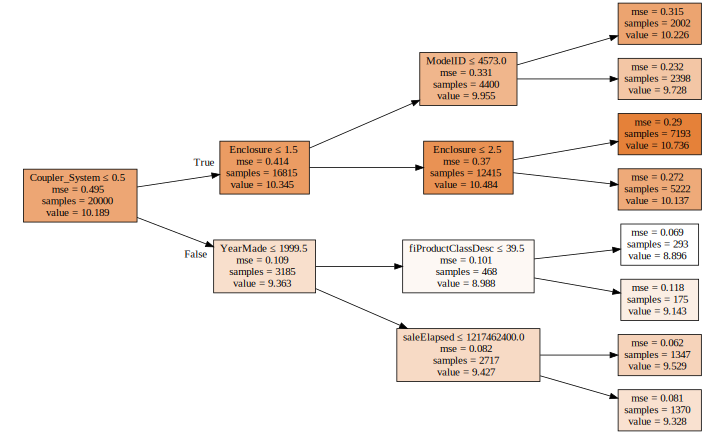

In [43]:
draw_tree(m.estimators_[0], df_trn, precision=3)

### Bagging
- In the bagging technique, we create multiple models, each giving predictions which are not correlated to the other.
- Then we average the predictions from these models. Random Forest is a bagging technique.

- If all the trees created are similar to each other and give similar predictions, then averaging these predictions will not improve the model performance. Instead, ** we can create multiple trees on a different subset of data, so that even if these trees overfit, they will do so on a different set of points**. These samples are taken with replacement.

- In * simple words* , ** we create multiple poor performing models and average them to create one good model**. The individual models must be as predictive as possible, but together should be uncorrelated. We will now increase the number of estimators in our random forest and see the results.

In [44]:
m = RandomForestRegressor(n_jobs=-1) # If we do not give a value to the n_estimator parameter, it is taken as 10 by default.
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.64 s, sys: 11.6 ms, total: 2.65 s
Wall time: 1.48 s
[0.10387796764036436, 0.34554475682665026, 0.9781861801996273, 0.7223220231048266]


In [0]:
# Further, np.stack will be used to concatenate the predictions one over the other.
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

In [47]:
preds.shape


(10, 8550)

- o/p: This means we have 10 predictions for each row in the validation set.

Now for comparing our model’s results against the validation set, here is the row of predictions, the mean of the predictions and the actual value from validation set.

In [48]:
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 9.71112,  9.30565, 10.40426,  9.79813,  9.4727 ,  9.95228,  9.95228,  9.87817,  9.92818,  9.92818]),
 9.833094623365573,
 9.852194258148577)

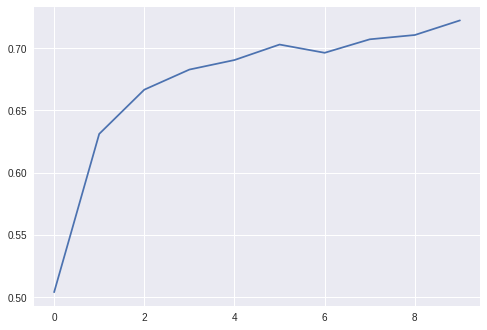

In [49]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

 ** The r^2 becomes better as the number of trees increases** . 
- You can experiment with the n_estimator value and see how the r^2 value changes with each iteration. 
- You’ll notice that after a certain number of trees, the r^2 value plateaus.

In [50]:
m = RandomForestRegressor(n_estimators=20,n_jobs=-1) # If we do not give a value to the n_estimator parameter, it is taken as 10 by default.
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6.6 s, sys: 8.84 ms, total: 6.61 s
Wall time: 3.49 s
[0.09492815368774463, 0.3477011732037948, 0.9817830820949446, 0.7188454387497547]


In [0]:
# Further, np.stack will be used to concatenate the predictions one over the other.
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

In [52]:
preds.shape

(20, 8550)

In [54]:
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 9.9988 ,  9.82553,  9.79813,  9.71112,  9.76996,  9.71112,  9.30565,  9.87817, 10.40426,  9.30565,
         9.30565,  9.79813,  9.51044,  9.30565,  9.71112,  9.95228,  9.71112,  9.30565,  9.68034,  9.79813]),
 9.689343783988253,
 9.852194258148577)

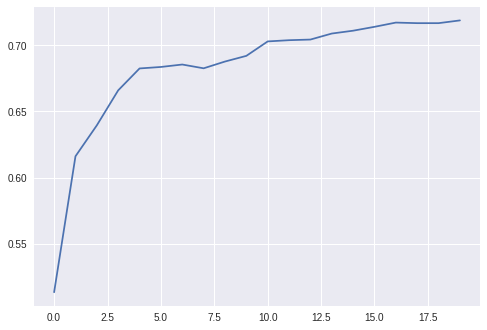

In [53]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

### Out-of-Bag (OOB) Score
* Creating a separate validation set for a small dataset can potentially be a problem since it will result in an even smaller training set. In such cases, we can use the data points (or samples) which the tree was not trained on.

For this, ** we set the parameter oob_score =True.**

In [55]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)


CPU times: user 14.9 s, sys: 35.4 ms, total: 14.9 s
Wall time: 7.76 s
[0.08889642518658862, 0.34317780190676894, 0.9840245379894269, 0.7261131394822555, 0.8843914015519942]


### Subsampling
* Earlier, we created a subset of 30,000 rows and the train set was randomly chosen from this subset. 
- As an alternative, we can create a different subset each time so that the model is trained on a larger part of the data.
- We use ** set_rf_samples **  to specify the sample size.
- ** reset_rf_samples()** # to reset back to normal



In [0]:
set_rf_samples(20000)

In [57]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 14.7 s, sys: 23.7 ms, total: 14.7 s
Wall time: 7.67 s
[0.09036655986807188, 0.33940793793669444, 0.9834917767999285, 0.7320974719326745, 0.8832335779248812]


In [58]:
# reset back to normal and check the difference
reset_rf_samples()
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 14.8 s, sys: 26.3 ms, total: 14.8 s
Wall time: 7.68 s
[0.0900158638654462, 0.3470111106471438, 0.9836196589315274, 0.7199603139692273, 0.8838985028399953]


### Hyperparameters
  - ** Min sample leaf**:This can be treated as the *stopping criteria for the tree*. 
  - The ** tree stops growing (or splitting) when the number of samples in the leaf node is less than specified**.

In [59]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3,n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)


CPU times: user 12.3 s, sys: 12.4 ms, total: 12.4 s
Wall time: 6.43 s
[0.12758139926663817, 0.344578547193279, 0.9670951773035878, 0.7238727341403353, 0.8825639636573059]


#### Max feature
- Another important parameter in random forest is ** max_features**. 
- We have discussed previously that the individual trees must be as uncorrelated as possible. 
- For the same,** random forest uses a subset of rows to train each tree. Additionally** , we can **also use a subset of columns (features) instead of using all the features**. 
- This is achieved by tweaking the **max_features parameter**.

In [60]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True) 
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 5.28 s, sys: 10.8 ms, total: 5.29 s
Wall time: 2.81 s
[0.13149667742268217, 0.3359312211090848, 0.9650445906864684, 0.7375578671017265, 0.8882691333344401]


In [0]:
# Further, np.stack will be used to concatenate the predictions one over the other.
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

In [62]:
preds.shape

(40, 8550)

In [63]:
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 9.42872,  9.49348,  9.69353,  9.69761,  9.66011,  9.56278,  9.63496,  9.26713,  9.54232,  9.78454,
         9.42024, 10.07354,  9.63592,  9.82302,  9.40298,  9.60116, 10.03999,  9.65906, 11.13323, 10.4035 ,
         9.60871,  9.69079,  9.47233,  9.64609,  9.67446,  9.56213,  9.44405,  9.42673,  9.68593,  9.61111,
        10.54258,  9.59669,  9.44462,  9.59281,  9.5502 ,  9.377  ,  9.75663,  9.78495,  9.74434,  9.49157]),
 9.691538296090387,
 9.852194258148577)

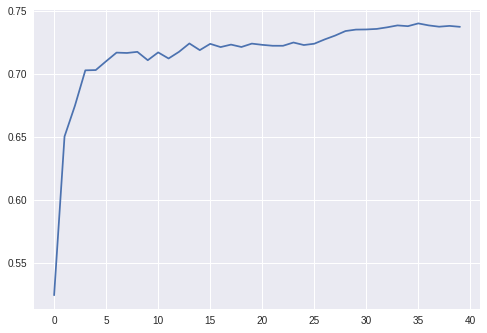

In [64]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(40)]);